# 0. Problem Statement:

## Goal: 
To determine:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Data Source:
- Location : America
- Meteorological survey
- People's styles

## Business Goal
- Model the demand for shared bikes with the available independent variables
- Target model usage:
    - Understand how exactly the demands vary with different features
    - Manipulate business strategy to meet demand levels and cater to cusomer satisfaction
    - Understand the demand dynamics of a new market

# Import relevant packages/libraries

In [1]:
import sys
print("Current Python Interpreter: ", sys.executable)   # print current interpreter in use
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import datetime
import calendar
import math as math

import pandas as pd
import category_encoders as ce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# work with plotly
import plotly.offline as py 
import plotly.io as pio
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import plotly.express as px

# Working with scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Working with statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


Current Python Interpreter:  /home/ssatyendras/WORK/TUTORIALS/ENV_AI_ML_UPGRAD/bin/python3.8


# 1. Data Visualization

## 1.1 Exploratory Data Analysis

In [2]:
# Import data
df_orig = pd.read_csv("day.csv")

### 1.1.1 Dataset Understanding

#### Dataset shape

In [3]:
print("Dataset shape: {}".format(df_orig.shape))
df_orig.sample(10)

Dataset shape: (730, 16)


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
429      430  06-03-2019       1   1     3        0        2           1   
655      656  18-10-2019       4   1    10        0        4           1   
119      120  30-04-2018       2   0     4        0        6           0   
104      105  15-04-2018       2   0     4        1        5           0   
273      274  01-10-2018       4   0    10        0        6           0   
626      627  19-09-2019       3   1     9        0        3           1   
6          7  07-01-2018       1   0     1        0        5           1   
4          5  05-01-2018       1   0     1        0        3           1   
374      375  10-01-2019       1   1     1        0        2           1   
516      517  01-06-2019       2   1     6        0        5           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
429           1  10.591653  12.75210  45.6667  13.458625     221        3735   
655           2  21.422500  25.63125  72.8333  15.874779    1008        6501   
119           1  19.372500  23.20105  50.3333  15.750025    1965        3347   
104           1  18.313347  22.09565  67.1250  15.167125     642        2484   
273           2  16.810000  20.64315  75.3750  19.583832     480        1949   
626           1  22.652500  27.02020  53.6667  14.416725     788        6803   
6             2   8.057402  10.44195  49.8696  11.304642     148        1362   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
374           1  12.656536  15.94130  64.6522  12.565984     173        3425   
516           2  26.820847  30.39810  75.5417  15.916721     533        3594   

      cnt  
429  3956  
655  7509  
119  5312  
104  3126  
273  2429  
626  7591  
6    1510  
4    1600  
374  3598  
516  4127

##### Dataset has timeseries, numeric and categorical variables

#### Datatypes and missing value analysis

In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### No missing values across any of the columns

In [5]:
df_orig.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### 1.1.2 Data Cleaning

In [6]:
#Variable types
dict_col_disp_names = {
    'dteday':'Date', 
    'season':'Season', 
    'yr':'Year', 
    'mnth':'Month', 
    'holiday':'Holiday?', 
    'weekday':'Weekday',
    'workingday':'Working Day?', 
    'weathersit':'Weather Type', 
    'temp':'Temperature', 
    'atemp':'Feels Temperature', 
    'hum':'Humidity', 
    'windspeed':'Windspeed',
    'casual':'#Casual Users', 
    'registered':'#Registered Users', 
    'users':'#Total Users',
    'wom': 'Week-of-Month',
    'temp_cat':  'Temperature',
    'atemp_cat': 'Feels Temperature', 
    'hum_cat':   'Humidity', 
    'windspeed_cat': 'Windspeed',
}
date_vars = ['dteday']
cat_vars = [
    'season', 'yr', 'mnth',
    'holiday', 'weekday', 'workingday',
    'weathersit'
    ]
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
out_vars = ['casual', 'registered', 'cnt']

#### Updating categorical variables 

In [7]:

dict_cat_var_names = {
    'season': {1:'spring', 2:'summer', 3:'fall', 4:'winter'},
    'yr':{0:'2018',1:'2019'}, 
    'mnth':{1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, 
    'weekday':{0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},
    'weathersit':{1:'Weather1',2:'Weather2',3:'Weather3',4:'Weather4'},
}

In [8]:
cat_vars_update = [
    'season', 'yr', 'mnth',
    'weekday'
    ]

df_boom = df_orig.copy(deep=True)
for cat_var in cat_vars_update:
    df_boom[cat_var] = df_boom[cat_var].map(dict_cat_var_names[cat_var])

df_boom.sample(10)

instant      dteday  season    yr mnth  holiday weekday  workingday  \
694      695  26-11-2019  winter  2019  Nov        0     Mon           1   
474      475  20-04-2019  summer  2019  Apr        0     Fri           1   
270      271  28-09-2018  winter  2018  Sep        0     Wed           1   
362      363  29-12-2018  spring  2018  Dec        0     Thu           1   
442      443  19-03-2019  spring  2019  Mar        0     Mon           1   
390      391  26-01-2019  spring  2019  Jan        0     Thu           1   
123      124  04-05-2018  summer  2018  May        0     Wed           1   
305      306  02-11-2018  winter  2018  Nov        0     Wed           1   
600      601  24-08-2019    fall  2019  Aug        0     Fri           1   
624      625  17-09-2019    fall  2019  Sep        0     Mon           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
694           1  12.846653  16.95020  53.5417   3.125550     337        4750   
474           1  21.593347  25.78875  69.4583  10.041357    1340        5950   
270           2  26.035000  28.75790  84.8750   9.958143     480        3427   
362           1  10.181653  13.19460  57.4167   8.000604     254        2169   
442           1  22.345000  26.64105  72.8750  10.875239     982        5171   
390           2  14.008347  17.80250  76.9583   4.917519     244        3831   
123           2  16.980847  20.23250  73.7083  22.042732     255        2378   
305           1  15.477500  19.50665  71.8750   5.500144     370        3816   
600           2  28.802500  32.35500  61.5000   4.833769    1325        6257   
624           2  23.814153  27.65250  73.4583  10.166714    1022        5847   

      cnt  
694  5087  
474  7290  
270  3907  
362  2423  
442  6153  
390  4075  
123  2633  
305  4186  
600  7582  
624  6869

In [9]:
df_boom.describe()

instant     holiday  workingday  weathersit        temp       atemp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    0.028767    0.683562    1.394521   20.319259   23.726322   
std    210.877136    0.167266    0.465405    0.544807    7.506729    8.150308   
min      1.000000    0.000000    0.000000    1.000000    2.424346    3.953480   
25%    183.250000    0.000000    0.000000    1.000000   13.811885   16.889713   
50%    365.500000    0.000000    1.000000    1.000000   20.465826   24.368225   
75%    547.750000    0.000000    1.000000    2.000000   26.880615   30.445775   
max    730.000000    1.000000    1.000000    3.000000   35.328347   42.044800   

              hum   windspeed       casual   registered          cnt  
count  730.000000  730.000000   730.000000   730.000000   730.000000  
mean    62.765175   12.763620   849.249315  3658.757534  4508.006849  
std     14.237589    5.195841   686.479875  1559.758728  1936.011647  
min      0.000000    1.500244     2.000000    20.000000    22.000000  
25%     52.000000    9.041650   316.250000  2502.250000  3169.750000  
50%     62.625000   12.125325   717.000000  3664.500000  4548.500000  
75%     72.989575   15.625589  1096.500000  4783.250000  5966.000000  
max     97.250000   34.000021  3410.000000  6946.000000  8714.000000

#### Create new feature

In [10]:
df_boom['dteday'] = pd.to_datetime(df_boom['dteday'])

In [11]:
# Create week of the month column
def get_weekof_month(arg_date):
    # print(arg_date)
    # # sample_date = datetime.datetime(year=arg_date.year,month=arg_date.month,day=arg_date.day)
    # print(arg_date.year)
    # print(arg_date.month)
    # print(arg_date.day)
    # # print(sample_date)
    first_day = arg_date.replace(day=1)
    adjusted_dom = arg_date.day + (1 + first_day.weekday()) % 7
    # print(adjusted_dom)
    return int(math.ceil(adjusted_dom/7.0))

In [12]:
# print(df_boom.dteday[100])
# print(get_weekof_month(df_boom.dteday[12]))
df_boom['wom'] = df_boom['dteday'].apply(get_weekof_month)
df_boom.sample(10)


instant     dteday  season    yr mnth  holiday weekday  workingday  \
400      401 2019-05-02  spring  2019  Feb        0     Sun           0   
574      575 2019-07-29    fall  2019  Jul        0     Sun           0   
677      678 2019-09-11  winter  2019  Nov        0     Fri           1   
300      301 2018-10-28  winter  2018  Oct        0     Fri           1   
319      320 2018-11-16  winter  2018  Nov        0     Wed           1   
632      633 2019-09-25  winter  2019  Sep        0     Tue           1   
567      568 2019-07-22    fall  2019  Jul        0     Sun           0   
689      690 2019-11-21  winter  2019  Nov        0     Wed           1   
479      480 2019-04-25  summer  2019  Apr        0     Wed           1   
268      269 2018-09-26  winter  2018  Sep        0     Mon           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
400           2  10.899153  13.22605  68.7917  11.791732     318        2629   
574           1  29.588347  33.39665  62.3750  11.416532    2153        4444   
677           1  14.828347  17.77065  54.0833  14.375386     709        5283   
300           2  13.564153  15.94060  58.5833  15.375093     456        3291   
319           3  18.723347  22.59940  93.0000   9.167543     145        1672   
632           1  22.550000  27.20895  57.0000  15.833507     845        6693   
567           2  27.367500  31.15625  76.2500   6.292694    2544        4866   
689           1  14.486653  18.24460  61.3750   6.917482     615        4531   
479           1  19.543347  23.51585  42.7917   7.959064     655        5541   
268           2  26.615847  29.45210  84.8333   7.416900     684        3946   

      cnt  wom  
400  2947    1  
574  6597    5  
677  5992    2  
300  3747    5  
319  1817    3  
632  7538    4  
567  7410    4  
689  5146    4  
479  6196    4  
268  4630    5

####  Drop irrelevant columns and change column names

In [13]:
df_boom = df_boom.drop(['instant','dteday','casual','registered'],axis=1)
df_boom.sample(10)

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
656  winter  2019  Oct        0     Fri           1           2  23.096653   
400  spring  2019  Feb        0     Sun           0           2  10.899153   
186    fall  2018  Jul        0     Wed           1           1  29.520000   
609    fall  2019  Sep        0     Sun           0           2  28.563347   
243    fall  2018  Sep        0     Thu           1           1  26.855000   
21   spring  2018  Jan        0     Sat           0           1   2.424346   
180    fall  2018  Jun        0     Thu           1           1  28.563347   
442  spring  2019  Mar        0     Mon           1           1  22.345000   
36   spring  2018  Feb        0     Sun           0           1  11.719153   
278  winter  2018  Oct        0     Thu           1           1  20.260847   

        atemp      hum  windspeed   cnt  wom  
656  26.89480  81.5000   9.041918  5424    3  
400  13.22605  68.7917  11.791732  2947    1  
186  34.28165  74.3333  10.042161  4629    2  
609  32.45000  81.5000   4.292744  5810    2  
243  30.74605  63.9167   9.500332  5115    2  
21    3.95348  40.0000  11.521990   981    4  
180  31.85040  43.4167  12.415904  5515    5  
442  26.64105  72.8750  10.875239  6153    4  
36   14.58355  56.8333   9.500600  1623    1  
278  24.02125  62.0833   9.041918  4765    3

In [14]:
# Rename 'cnt'
df_boom.rename(columns={'cnt':'users'},inplace=True)
df_boom.sample(10)

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
614    fall  2019  Sep        0     Fri           1           1  28.836653   
295  winter  2018  Oct        0     Sun           0           1  17.288347   
398  spring  2019  Feb        0     Fri           1           1  12.846653   
293  winter  2018  Oct        0     Fri           1           1  17.527500   
604    fall  2019  Aug        0     Tue           1           1  29.861653   
252    fall  2018  Sep        0     Sat           0           1  27.060000   
241    fall  2018  Aug        0     Tue           1           1  26.205847   
702  winter  2019  Dec        0     Tue           1           1  19.509153   
154  summer  2018  Jun        0     Sat           0           1  26.035000   
317  winter  2018  Nov        0     Mon           1           1  21.730000   

        atemp      hum  windspeed  users  wom  
614  32.86020  73.6250  11.500282   7504    2  
295  21.11665  74.1250   6.667338   4381    4  
398  15.46730  52.6667  11.959232   4151    1  
293  21.17980  57.4167  14.833532   4304    4  
604  33.30250  62.0000  12.791975   7040    5  
252  30.39810  75.3750  10.291736   5345    2  
241  29.73520  54.8333   8.375536   5204    5  
702  23.45270  73.3750  11.666643   6606    2  
154  29.73480  45.6250   8.250514   5342    1  
317  26.23060  58.7083  20.541932   4486    3

### 1.1.3 Univariate Analysis

#### Unordered Categorical: Season, Holiday, Working Day, Weather

##### Functions

In [15]:
# Pie Chart
def univar_unordered_pie(df_data,var_name):
    uniq_cats = df_data[var_name].unique()
    print("{}: {} categories".format(var_name,len(uniq_cats)))
    df_freq = pd.crosstab(index=df_data[var_name], columns='count').sort_values(by='count',ascending=False)
    # print(df_freq['count'])
    ## Plot data
    tr0 = go.Pie(
                labels=df_freq.index,
                values=df_freq["count"][:],
                name='{} values'.format(dict_col_disp_names[var_name])
            )
    plot_data = [tr0]
    layout = go.Layout(
        title='Distribution of {}'.format(dict_col_disp_names[var_name]),
         margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=20  #top margin
        ),
        width=500,
        height=500
    )
    fig = go.Figure(data=plot_data,layout=layout)
    fig.update_layout(title_y=0.0,title_x=0.5)
    return fig

# Bar plots
def univar_unordered_bar(df_data,var_name):
    uniq_cats = df_data[var_name].unique()
    print("{}: {} categories".format(var_name,len(uniq_cats)))
    df_freq = pd.crosstab(index=df_data[var_name], columns='count').sort_values(by='count',ascending=False)
    # print(df_freq['count'])
    ## Plot data
    tr0 = go.Bar(
                x = df_freq.index,
                y = df_freq["count"][:],
                name='{} counts'.format(dict_col_disp_names[var_name])
            )
    plot_data = [tr0]
    layout = go.Layout(
        yaxis=dict(
            title='Frequency'
        ),
        xaxis=dict(
            title='{}'.format(dict_col_disp_names[var_name]),
            tickangle=60,
            dtick=1
        ),
        title='{} Rank Data'.format(dict_col_disp_names[var_name]),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        )  
    )
    fig = go.Figure(data=plot_data, layout=layout)
    fig.update_layout(title_y=0.0,title_x=0.5)
    return fig

##### Season

In [16]:
var_name= 'season'
fig = univar_unordered_pie(df_boom,var_name)
py.iplot(fig, filename='uni_cat_{}'.format(var_name))
pio.write_image(fig, "./AnalysisData/uni_unord_{}.png".format(var_name), format='png')

season: 4 categories


##### Holiday

In [17]:
var_name= 'holiday'
fig = univar_unordered_pie(df_boom,var_name)
py.iplot(fig, filename='uni_cat_{}'.format(var_name))
pio.write_image(fig, "./AnalysisData/uni_unord_{}.png".format(var_name), format='png')

holiday: 2 categories


##### Working Day

In [18]:
var_name= 'workingday'
fig = univar_unordered_pie(df_boom,var_name)
py.iplot(fig, filename='uni_cat_{}'.format(var_name))
pio.write_image(fig, "./AnalysisData/uni_unord_{}.png".format(var_name), format='png')

workingday: 2 categories


##### Weather

In [19]:
var_name= 'weathersit'
fig = univar_unordered_pie(df_boom,var_name)
py.iplot(fig, filename='uni_cat_{}'.format(var_name))
pio.write_image(fig, "./AnalysisData/uni_unord_{}.png".format(var_name), format='png')

weathersit: 3 categories


#### Ordered Categorical: Year, Month, Weekday

##### Functions

In [20]:
## Set ordering of categoical variables
dict_order_cat_vars = {
    'weekday':      {'Sun':0,     'Mon':1,    'Tue':2,    'Wed':3,    'Thu':4,    'Fri':5,    'Sat':6},
    'mnth':         {'Jan':1,    'Feb':2,    'Mar':3,    'Apr':4,   'May':5,  'Jun':6,  'Jul':7,  'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12},
    'yr':           {'2018':2018,      "2019":2019},
}
# Bar plot
def uni_ordered_bar(df_final_data,var_name):
    uniq_cats = df_final_data[var_name].unique()
    print("{}: {} categories".format(var_name,len(uniq_cats)))
    df_freq = pd.crosstab(index=df_final_data[var_name], columns='count')
    # print(df_freq)
    df_freq = df_freq.add_prefix('tot_').reset_index().rename_axis(None, axis=1) 
    # print(df_freq)
    ## Plot data
    # print(df_freq["count"])
    if var_name in dict_order_cat_vars:
        df_freq['sort'] = [dict_order_cat_vars[var_name][x] for x in df_freq[var_name]]
        df_freq = df_freq.sort_values(by='sort')
    else:
        df_freq = df_freq.sort_values(by=var_name)
    # print(df_freq)
    tr0 = go.Bar(
                x = df_freq[var_name],
                y = df_freq["tot_count"],
                name='{}'.format(dict_col_disp_names[var_name])
            )
    plot_data = [tr0]
    layout = go.Layout(
        yaxis=dict(
            title='Frequency'
        ),
        xaxis=dict(
            title='{}'.format(dict_col_disp_names[var_name]),
            # tickangle=60,
            dtick=1
        ),
        title='{} Distribution'.format(dict_col_disp_names[var_name]),
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        )
    )
    fig = go.Figure(data=plot_data, layout=layout)
    fig.update_layout(title_y=0.0,title_x=0.5)
    return fig

##### Year 

In [21]:
var_name = 'yr'
fig = uni_ordered_bar(df_boom,var_name)
fig.update_layout(width=200,height=500)
py.iplot(fig, filename='uni_cat_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/uni_ord_{}.png".format(var_name), format='png')

yr: 2 categories


##### Month 

In [22]:
var_name = 'mnth'
fig = uni_ordered_bar(df_boom,var_name)
fig.update_layout(width=200,height=500)
py.iplot(fig, filename='uni_cat_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/uni_ord_{}.png".format(var_name), format='png')

mnth: 12 categories


##### Weekday 

In [23]:
var_name = 'weekday'
fig = uni_ordered_bar(df_boom,var_name)
fig.update_layout(width=200,height=500)
py.iplot(fig, filename='uni_cat_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/uni_ord_{}.png".format(var_name), format='png')

weekday: 7 categories


#### Quantitative: Temperature, A-Temperature, Humidity, Windspeed, Users, Week-of-Month

##### Temperatures

In [24]:
## Plot data
tr0 = go.Box(
            y = df_boom['temp'].values,
            name=dict_col_disp_names['temp']
        )
tr1 = go.Box(
            y = df_boom['atemp'].values,
            name=dict_col_disp_names['atemp']
        )
# tr2 = go.Box(
#             y = df_boom['funded_amnt_inv'].values,
#             name=df_boom['funded_amnt_inv']
#         )
plot_data = [tr0, tr1, ]#tr2]
layout = go.Layout(
    yaxis=dict(
        title='Temperatures'
    ),
    xaxis=dict(
        #title='Issue Year',
        # tickangle=60,
        dtick=1
    ),
    title='Temperatures',
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        )
)
fig = go.Figure(data=plot_data, layout=layout)
fig.update_layout(width=600,height=500)
py.iplot(fig, filename='uni_quant_temps')     
pio.write_image(fig, "AnalysisData/uni_quant_temps.png".format(var_name), format='png')

##### Humidity

In [25]:
var_name = 'hum'
## Plot data
tr0 = go.Box(
            y = df_boom[var_name].values,
            name=dict_col_disp_names[var_name]
        )

plot_data = [tr0]
layout = go.Layout(
    yaxis=dict(
        title='Humidity (in %)'
    ),
    xaxis=dict(
        #title='Issue Year',
        # tickangle=60,
        dtick=1
    ),
    title='Humidity',
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        )
)
fig = go.Figure(data=plot_data, layout=layout)
fig.update_layout(width=200,height=500)
py.iplot(fig, filename='uni_quant_humidity')   
pio.write_image(fig, "AnalysisData/uni_quant_humidity.png".format(var_name), format='png')

##### Windspeed

In [26]:
var_name = 'windspeed'
## Plot data
tr0 = go.Box(
            y = df_boom[var_name].values,
            name=dict_col_disp_names[var_name]
        )

plot_data = [tr0]
layout = go.Layout(
    yaxis=dict(
        title='Windspeed'
    ),
    xaxis=dict(
        #title='Issue Year',
        # tickangle=60,
        dtick=1
    ),
    title='Windspeed',
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        )
)
fig = go.Figure(data=plot_data, layout=layout)
fig.update_layout(width=200,height=500)
py.iplot(fig, filename='uni_quant_windspeed')   
pio.write_image(fig, "AnalysisData/uni_quant_windspeed.png".format(var_name), format='png')

##### Users

In [27]:
var_name = 'users'
## Plot data
tr0 = go.Box(
            y = df_boom[var_name].values,
            name=dict_col_disp_names[var_name]
        )

plot_data = [tr0]
layout = go.Layout(
    yaxis=dict(
        title='# Users'
    ),
    xaxis=dict(
        #title='Issue Year',
        # tickangle=60,
        dtick=1
    ),
    title='Users',
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        )
)
fig = go.Figure(data=plot_data, layout=layout)
fig.update_layout(width=200,height=500)
py.iplot(fig, filename='uni_quant_users')   
pio.write_image(fig, "AnalysisData/uni_quant_users.png".format(var_name), format='png')

##### Week-of-Month

In [28]:
var_name = 'wom'
## Plot data
tr0 = go.Box(
            y = df_boom[var_name].values,
            name=dict_col_disp_names[var_name]
        )

plot_data = [tr0]
layout = go.Layout(
    yaxis=dict(
        title='Week-of-Month'
    ),
    xaxis=dict(
        #title='Issue Year',
        # tickangle=60,
        dtick=1
    ),
    title='Week-of-Month',
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        )
)
fig = go.Figure(data=plot_data, layout=layout)
fig.update_layout(width=200,height=500)
py.iplot(fig, filename='uni_quant_users')   
pio.write_image(fig, "AnalysisData/uni_quant_wom.png".format(var_name), format='png')

### 1.1.4 Segmented Univariate Analysis

#### Create categorical variables from quantitative variables: Temperature, A-Temperature, Humidity, Windspeed

In [29]:
# -- Temperature
temp_bins= [float('-Inf'),0, 10, 20, 30, 40, float('Inf')]
temp_labels= ['< 0', '0-10', '10-20', '20-30', '30-40', '> 40']
df_boom['temp_cat'] = pd.cut(df_boom['temp'], bins=temp_bins, labels=temp_labels).astype('category')
df_boom.sample(10)

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
71   spring  2018  Mar        0     Sun           0           1  15.758268   
446  summer  2019  Mar        0     Fri           1           2  24.668347   
310  winter  2018  Nov        0     Mon           1           1  16.195000   
691  winter  2019  Nov        0     Fri           1           1  15.101653   
581    fall  2019  Aug        0     Sun           0           1  31.535847   
38   spring  2018  Feb        0     Tue           1           1   9.054153   
468  summer  2019  Apr        0     Sat           0           1  20.295000   
356  spring  2018  Dec        0     Fri           1           1  15.306653   
169  summer  2018  Jun        0     Sun           0           2  28.665847   
714  winter  2019  Dec        0     Sun           0           2  14.862500   

        atemp      hum  windspeed  users  wom temp_cat  
71   19.00455  52.7391  18.130468   2417    3    10-20  
446  28.50335  69.4167   7.792100   8362    4    20-30  
310  20.04355  75.8750   3.834075   4035    2    10-20  
691  18.93895  56.8750   9.917407   3910    4    10-20  
581  36.55395  65.2500  19.458207   5464    2    30-40  
38    9.91230  53.7917  24.250650   1530    1     0-10  
468  24.39980  50.2917  12.791439   7460    3    20-30  
356  18.87565  68.6250  18.374482   2209    5    10-20  
169  32.29230  66.6667   6.834000   4744    4    20-30  
714  18.49690  83.8750   6.749714   3786    3    10-20

In [30]:
# -- A-Temperature
atemp_bins= [float('-Inf'),0, 10, 20, 30, 40, float('Inf')]
atemp_labels= ['< 0', '0-10', '10-20', '20-30', '30-40', '> 40']
df_boom['atemp_cat'] = pd.cut(df_boom['atemp'], bins=atemp_bins, labels=atemp_labels).astype('category')
df_boom.sample(10)

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
433  spring  2019  Mar        0     Sat           0           1  11.787500   
33   spring  2018  Feb        0     Thu           1           1   7.665237   
359  spring  2018  Dec        1     Mon           0           1  13.191299   
269  winter  2018  Sep        0     Tue           1           2  26.103347   
331  winter  2018  Nov        0     Mon           1           1  20.642598   
324  winter  2018  Nov        0     Mon           1           3  18.347500   
258    fall  2018  Sep        0     Fri           1           2  19.235847   
205    fall  2018  Jul        0     Mon           1           1  30.476653   
177    fall  2018  Jun        0     Mon           1           2  27.982500   
242    fall  2018  Aug        0     Wed           1           1  26.923347   

        atemp      hum  windspeed  users  wom temp_cat atemp_cat  
433  13.88835  35.0417  15.125250   4118    1    10-20     10-20  
33    8.89390  43.7826  18.609384   1550    1     0-10      0-10  
359  15.77675  50.6957  16.044155   1317    5    10-20     10-20  
269  28.72625  88.5417   7.917457   4120    5    20-30     20-30  
331  24.50610  74.3043   9.522174   3867    5    20-30     20-30  
324  22.25310  91.0000   9.249618   2765    4    10-20     20-30  
258  23.07375  59.0417  11.000261   4760    4    10-20     20-30  
205  36.04790  75.7083   6.084156   3840    4    30-40     30-40  
177  31.85020  65.8333   7.208396   4708    5    20-30     30-40  
242  30.55605  59.7917   5.583331   5058    5    20-30     30-40

In [31]:
# -- Humidity
hum_bins= [float('-Inf'), 10, 20, 30, 40, 50,60,70,80,90,100]
hum_labels= ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90','90-100']
df_boom['hum_cat'] = pd.cut(df_boom['hum'], bins=hum_bins, labels=hum_labels).astype('category')
df_boom.sample(10)

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
261    fall  2018  Sep        0     Mon           1           2  22.515847   
366  spring  2019  Jan        1     Mon           0           1  11.194763   
538    fall  2019  Jun        0     Sat           0           1  29.998347   
470  summer  2019  Apr        1     Mon           0           1  27.230847   
573    fall  2019  Jul        0     Sat           0           1  30.989153   
234    fall  2018  Aug        0     Tue           1           1  26.274153   
398  spring  2019  Feb        0     Fri           1           1  12.846653   
712  winter  2019  Dec        0     Fri           1           1  11.548347   
149  summer  2018  May        1     Mon           0           1  30.066653   
90   summer  2018  Apr        0     Fri           1           2  12.300000   

        atemp      hum  windspeed  users  wom temp_cat atemp_cat hum_cat  
261  26.48375  69.0000  10.166714   4539    4    20-30     20-30   60-70  
366  12.61520  38.1304  22.087555   1951    1    10-20     10-20   30-40  
538  32.63960  53.4583  12.041307   7458    5    20-30     30-40   50-60  
470  30.74625  56.1667  19.083543   6370    3    20-30     30-40   50-60  
573  34.88020  61.3333  10.542450   6685    5    30-40     30-40   60-70  
234  30.30335  45.5417   9.833121   5895    4    20-30     30-40   40-50  
398  15.46730  52.6667  11.959232   4151    1    10-20     10-20   50-60  
712  14.70960  64.2917   8.792343   5611    2    10-20     10-20   60-70  
149  33.55460  68.5000   8.792075   4098    5    30-40     30-40   60-70  
90   14.17270  68.6250  17.333436   2227    1    10-20     10-20   60-70

In [32]:
# -- Windspeed
windspeed_bins= [0, 5, 10, 15, 20, 25,float('Inf')]
windspeed_labels= ['0-5', '5-10', '10-15', '15-20', '20-25', '> 25']
df_boom['windspeed_cat'] = pd.cut(df_boom['windspeed'], bins=windspeed_bins, labels=windspeed_labels).astype('category')
df_boom.sample(10)

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
303  winter  2018  Oct        0     Mon           1           1  13.940000   
603    fall  2019  Aug        0     Mon           1           1  28.836653   
550    fall  2019  Jul        0     Thu           1           1  33.927500   
213    fall  2018  Aug        0     Tue           1           1  32.116653   
52   spring  2018  Feb        0     Tue           1           1   7.471102   
668  winter  2019  Oct        0     Wed           1           2  14.657500   
204    fall  2018  Jul        0     Sun           0           1  34.030000   
350  winter  2018  Dec        0     Sat           0           2  10.591653   
523  summer  2019  Jun        0     Fri           1           1  26.615847   
17   spring  2018  Jan        0     Tue           1           2   8.883347   

        atemp      hum  windspeed  users  wom temp_cat atemp_cat hum_cat  \
303  17.80315  70.3333   7.125450   3669    5    10-20     10-20   70-80   
603  32.73440  73.0417   8.625111   6917    5    20-30     30-40   70-80   
550  38.06835  45.7917  12.999943   6241    2    30-40     30-40   40-50   
213  35.35355  49.1250  13.791950   4845    2    30-40     30-40   40-50   
52    9.30165  57.7778  13.110761   1450    4     0-10      0-10   50-60   
668  18.05500  66.6667  11.166689   5566    5    10-20     10-20   60-70   
204  39.74145  55.0833  11.334457   3606    4    30-40     30-40   50-60   
350  12.46855  56.0833  16.292189   2739    4    10-20     10-20   50-60   
523  29.89310  46.7917  11.750661   7736    2    20-30     20-30   40-50   
17   11.61665  86.1667   9.833925    683    3     0-10     10-20   80-90   

    windspeed_cat  
303          5-10  
603          5-10  
550         10-15  
213         10-15  
52          10-15  
668         10-15  
204         10-15  
350         15-20  
523         10-15  
17           5-10

In [33]:
## Set ordering of categoical variables
dict_order_cat_vars = {
    'weekday':      {'Sun':0,     'Mon':1,    'Tue':2,    'Wed':3,    'Thu':4,    'Fri':5,    'Sat':6},
    'mnth':         {'Jan':1,    'Feb':2,    'Mar':3,    'Apr':4,   'May':5,  'Jun':6,  'Jul':7,  'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12},
    'yr':           {'2018':2018,      "2019":2019},
    'temp_cat':         {'< 0':0, '0-10':1, '10-20':2, '20-30':3, '30-40':4, '> 40':5},
    'atemp_cat':        {'< 0':0, '0-10':1, '10-20':2, '20-30':3, '30-40':4, '> 40':5},
    'hum_cat':          {'0-10':0, '10-20':1, '20-30':2, '30-40':3, '40-50':4, '50-60':5, '60-70':6, '70-80':7, '80-90':8, '90-100':9},
    'windspeed_cat':    {'0-5':0, '5-10':1, '10-15':2, '15-20':3, '20-25':4, '> 25':5},
    'weathersit':   {1:1, 2:2, 3:3, 4:4},
    'season':       {'spring':1, 'summer':2, 'fall':3, 'winter':4},
    'holiday':      {0:0, 1:1},
    'workingday':   {0:0, 1:1},
    'wom':          {1:1, 2:2, 3:3, 4:4,5:5, 6:6}
}

#### Function for users per category

In [34]:
def get_seg_analysis_plot(data_df, var_name):
    uniq_cats = data_df[var_name].unique()
    print("{}: {} categories".format(var_name,len(uniq_cats)))
    # print(uniq_cats)
    sorted_cats = sorted(uniq_cats,key=dict_order_cat_vars[var_name].get)
    # print(sorted_cats)
    fig = go.Figure()
    list_avg_vals = []
    for cat_name in sorted_cats:
        fig.add_trace(
            go.Box(
                y = data_df[data_df[var_name]==cat_name]['users'],
                name=str(cat_name),
                boxpoints='all'
            )
        )
        list_avg_vals.append(data_df[data_df[var_name]==cat_name]['users'].mean())
    fig.add_trace(
        go.Scatter(
            mode='lines',
            line={'dash': 'dash', 'color': 'black'},
            x=sorted_cats,
            y=list_avg_vals,
            name="Average",
            yaxis='y1'
        )
    )

    fig.layout.update(
        yaxis=dict(
            title=dict_col_disp_names['users']
        ),
        xaxis=dict(
            title=dict_col_disp_names[var_name]
        ),
        title=dict_col_disp_names['users'] + ' & ' + dict_col_disp_names[var_name],
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        ),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    fig.update_layout(title_y=0.0,title_x=0.5)
    return fig

#### Weekday

In [35]:
var_name = 'weekday'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

weekday: 7 categories


#### Month

In [36]:
var_name = 'mnth'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

mnth: 12 categories


#### Year

In [37]:
var_name = 'yr'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

yr: 2 categories


#### Season

In [38]:
var_name = 'season'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

season: 4 categories


#### Temperature

In [39]:
var_name = 'temp_cat'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

temp_cat: 4 categories


#### A-Temperature

In [40]:
var_name = 'atemp_cat'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

atemp_cat: 5 categories


#### Humidity

In [41]:
var_name = 'hum_cat'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

hum_cat: 10 categories


#### Windspeed

In [42]:
var_name = 'windspeed_cat'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

windspeed_cat: 6 categories


#### Weather

In [43]:
var_name = 'weathersit'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

weathersit: 3 categories


#### Holiday

In [44]:
var_name = 'holiday'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

holiday: 2 categories


#### Working Day ?

In [45]:
var_name = 'workingday'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

workingday: 2 categories


#### Week-of-Month

In [46]:
var_name = 'wom'
fig = get_seg_analysis_plot(df_boom,var_name)
# fig.update_layout(width=200,height=500)
py.iplot(fig, filename='seg_analysis_{}'.format(var_name))
pio.write_image(fig, "AnalysisData/seg_analysis_{}.png".format(var_name), format='png')

wom: 6 categories


### 1.1.5 Bivariate analysis

#### Continuous variables

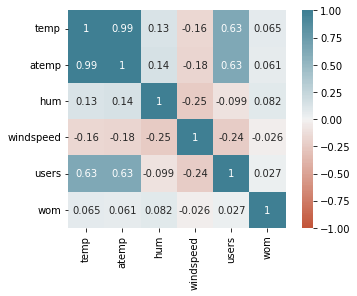

In [47]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'users','wom']

df_cont_bivar = pd.DataFrame(df_boom,columns=cont_vars)
corrMatrix = df_cont_bivar.corr()
sns.heatmap(corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
    )
plt.show()

#### Categorical variables

In [48]:
df_boom.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'users', 'wom',
       'temp_cat', 'atemp_cat', 'hum_cat', 'windspeed_cat'],
      dtype='object')

##### Function to plot

In [49]:
def plot_bivar_analysis(df_data,var_1,var_2,target_var):
    # fig = go.Figure()
    # fig.add_trace(
    #     go.Box(
    #         y = df_data[df_data[var_name]==cat_name]['users'],
    #         name=str(cat_name),
    #         boxpoints='all'
    #     )
    # )
    df_plot_data = df_boom.copy(deep=True)
    dict_keys={}
    for dict_key in dict_order_cat_vars:
        dict_keys[dict_key] = list(dict_order_cat_vars[dict_key].keys())
    fig = px.box(df_data, x=var_1, y=target_var, color=var_2,points="all",category_orders=dict_keys)
    fig.layout.update(
        yaxis=dict(
            title=dict_col_disp_names['users']
        ),
        xaxis=dict(
            title=dict_col_disp_names[var_1]
        ),
        legend_title_text=dict_col_disp_names[var_2],
        title=dict_col_disp_names['users'] + ' for ' + dict_col_disp_names[var_1] + ' & ' + dict_col_disp_names[var_2],
        margin=go.layout.Margin(
            l=20, #left margin
            r=20, #right margin
            b=20, #bottom margin
            t=30  #top margin
        ),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1,
        )
    )
    # fig.update_xaxes(categoryorder='array', categoryarray= list(dict_order_cat_vars[var_1].keys()))
    fig.update_layout(title_y=0.0,title_x=0.5)
    return fig

# var_1 = 'temp_cat'
# var_2 = 'hum_cat'
# target_var = 'users'
# fig = plot_bivar_analysis(df_boom,var_1,var_2,target_var)
# py.iplot(fig, filename='bivar_analysis_{}_{}'.format(var_1,var_2))
# pio.write_image(fig, "AnalysisData/'bivar_analysis_{}_{}".format(var_1,var_2), format='png')

##### Season & Holiday

In [50]:
var_1 = 'season'
var_2 = 'holiday'
target_var = 'users'
fig = plot_bivar_analysis(df_boom,var_1,var_2,target_var)
py.iplot(fig, filename='bivar_analysis_{}_{}'.format(var_1,var_2))
pio.write_image(fig, "AnalysisData/'bivar_analysis_{}_{}".format(var_1,var_2), format='png')

##### Temperature & Holiday

In [51]:
var_1 = 'temp_cat'
var_2 = 'holiday'
target_var = 'users'
fig = plot_bivar_analysis(df_boom,var_1,var_2,target_var)
py.iplot(fig, filename='bivar_analysis_{}_{}'.format(var_1,var_2))
pio.write_image(fig, "AnalysisData/'bivar_analysis_{}_{}".format(var_1,var_2), format='png')

##### Weekday & A-Temperature

In [52]:
var_1 = 'weekday'
var_2 = 'atemp_cat'
target_var = 'users'
fig = plot_bivar_analysis(df_boom,var_1,var_2,target_var)
py.iplot(fig, filename='bivar_analysis_{}_{}'.format(var_1,var_2))
pio.write_image(fig, "AnalysisData/'bivar_analysis_{}_{}".format(var_1,var_2), format='png')

##### Month & Week-of-Month

In [53]:
var_1 = 'mnth'
var_2 = 'wom'
target_var = 'users'
fig = plot_bivar_analysis(df_boom,var_1,var_2,target_var)
py.iplot(fig, filename='bivar_analysis_{}_{}'.format(var_1,var_2))
pio.write_image(fig, "AnalysisData/'bivar_analysis_{}_{}".format(var_1,var_2), format='png')

##### Temperature & Humidity

In [54]:
var_1 = 'temp_cat'
var_2 = 'hum_cat'
target_var = 'users'
fig = plot_bivar_analysis(df_boom,var_1,var_2,target_var)
py.iplot(fig, filename='bivar_analysis_{}_{}'.format(var_1,var_2))
pio.write_image(fig, "AnalysisData/'bivar_analysis_{}_{}".format(var_1,var_2), format='png')

## 1.2 Correlation between variables

### 1.2.1 Pairplot across all variables

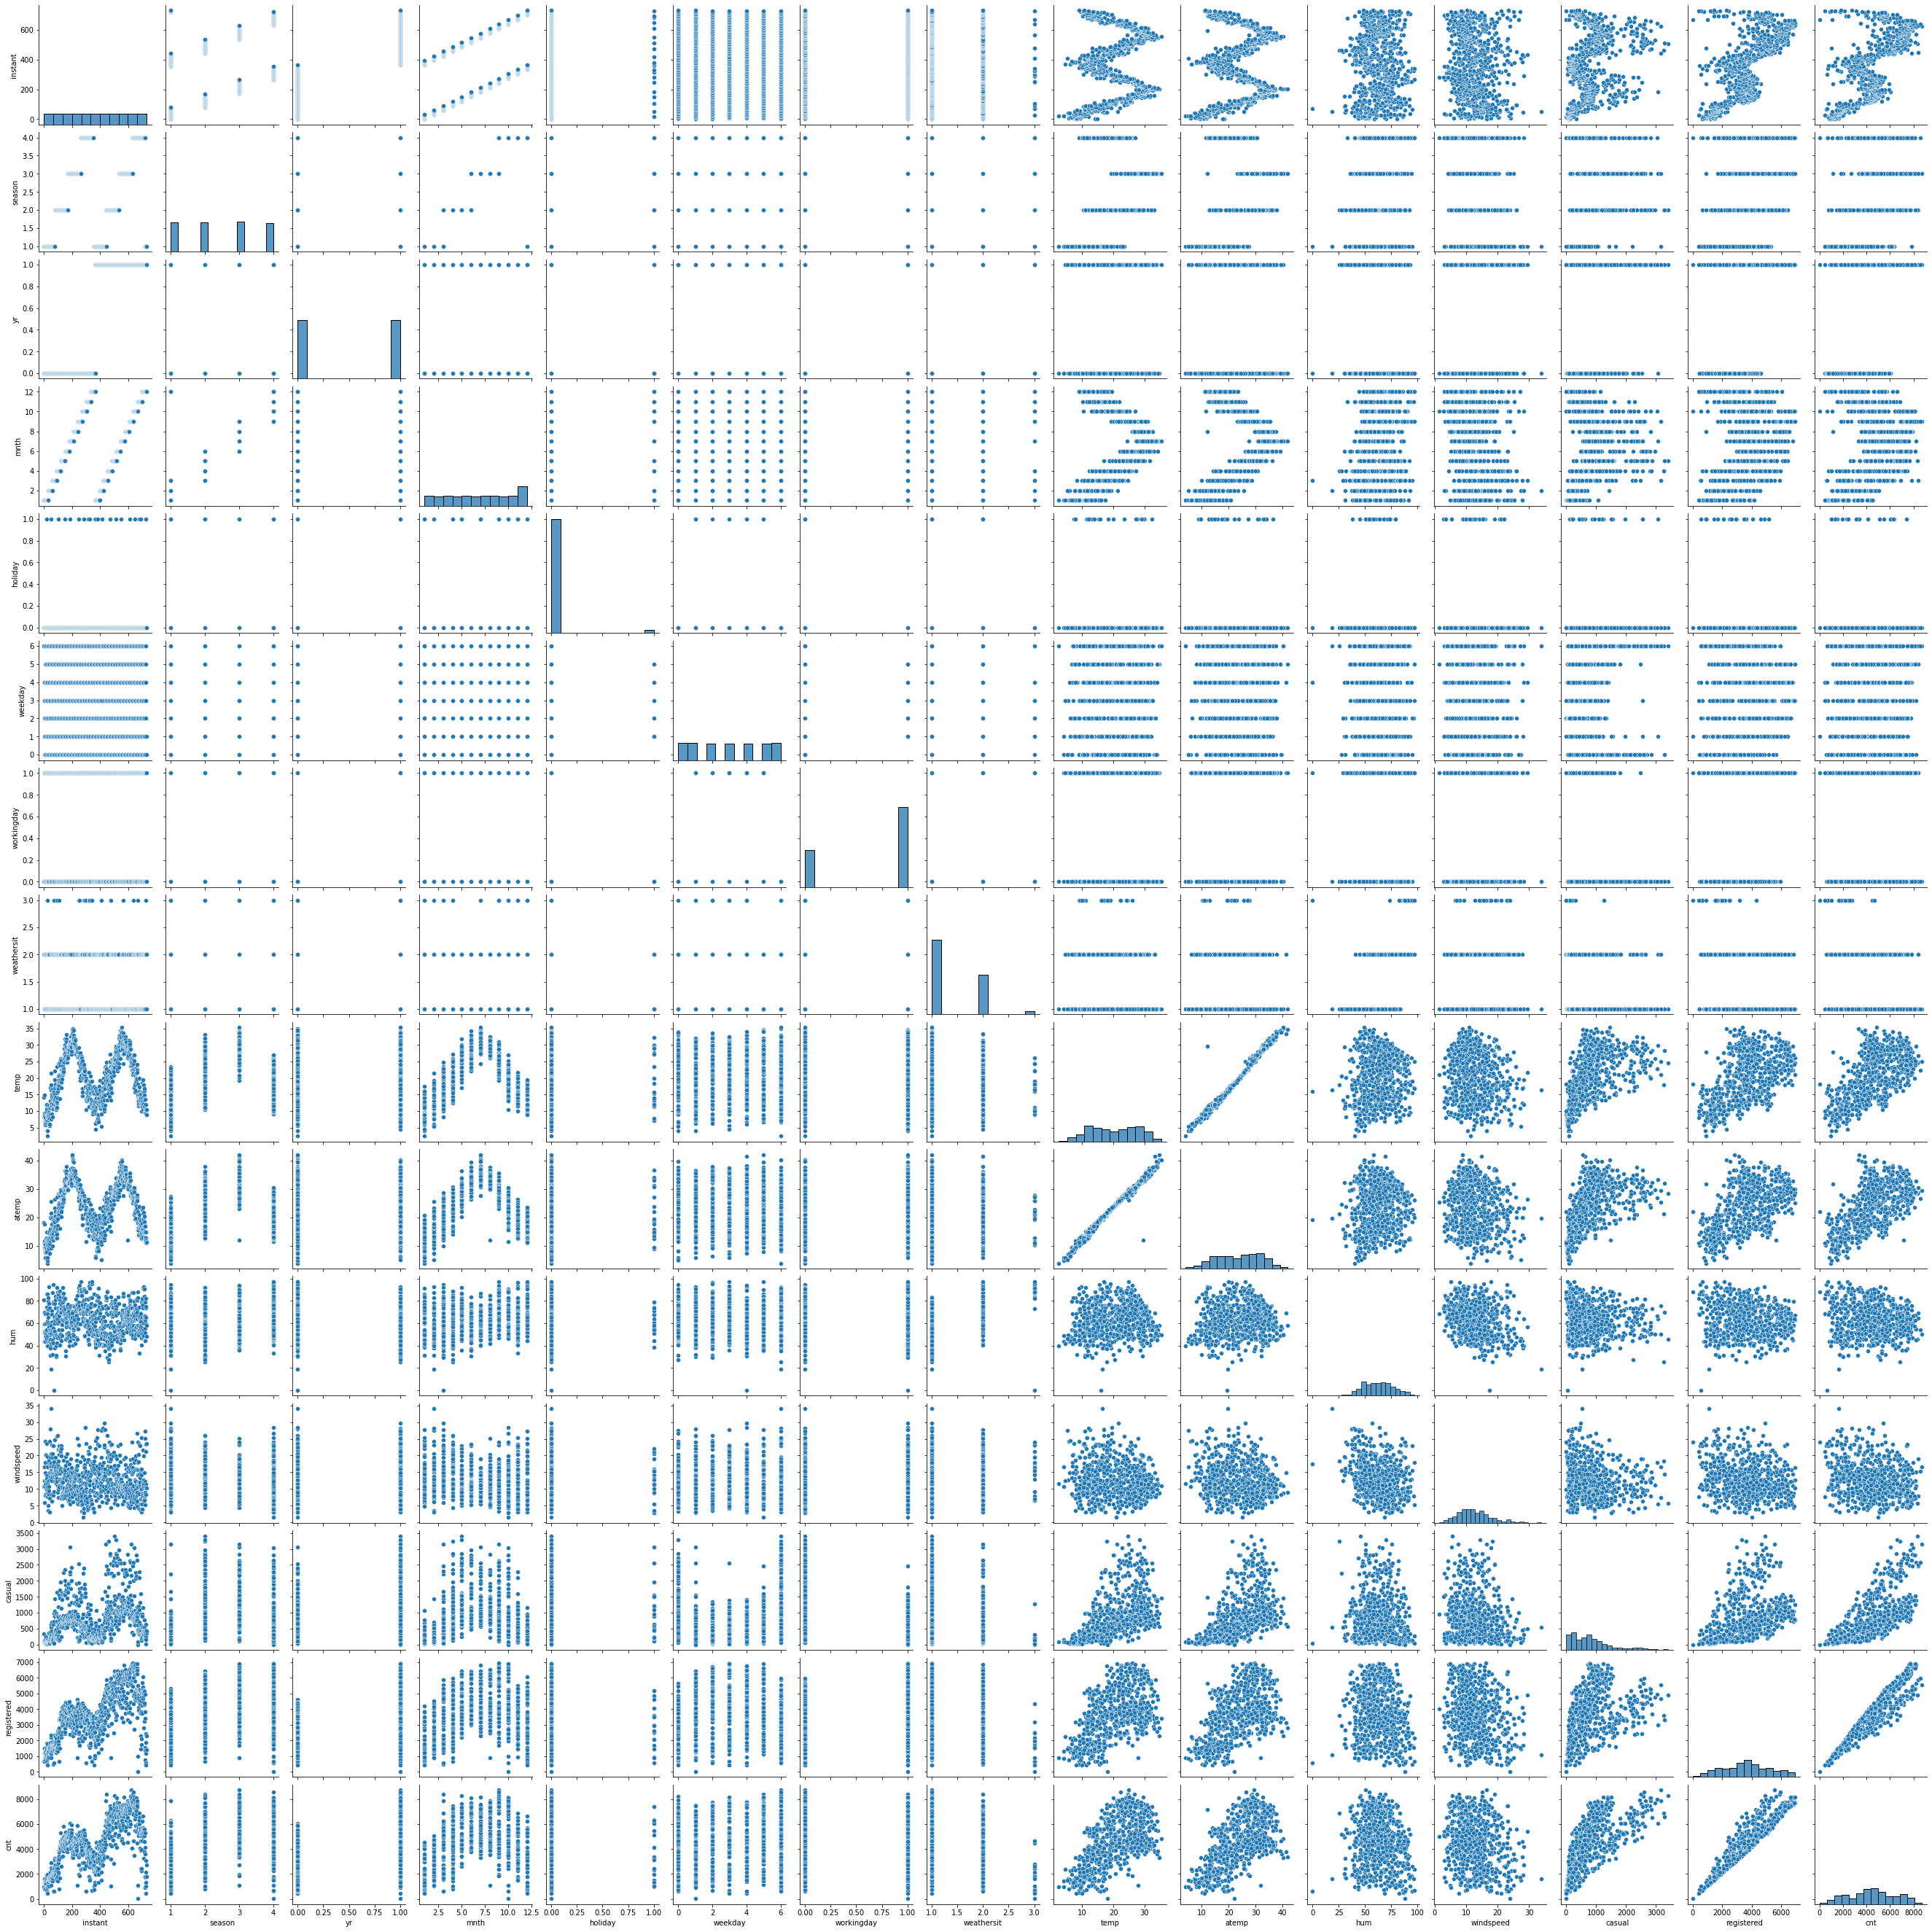

In [55]:
sns.pairplot(df_orig)
plt.show()

### 1.2.2 Correlation matrix

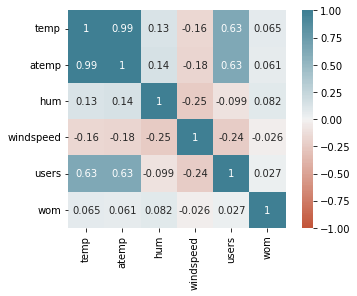

In [56]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'users', 'wom']

df_cont_bivar = pd.DataFrame(df_boom,columns=cont_vars)
corrMatrix = df_cont_bivar.corr()
sns.heatmap(corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
    )
plt.show()


### 1.2.3 User variation patterns across variables 

#### Date-type varible

In [57]:
tr0=go.Bar(
    x=df_orig['dteday'],
    y=df_orig['cnt'],
    name="Total"
)
tr1=go.Bar(
    x=df_orig['dteday'],
    y=df_orig['casual'],
    name="Casual"
)
tr2=go.Bar(
    x=df_orig['dteday'],
    y=df_orig['registered'],
    name="Registered"
)
plot_data=[tr0,tr1,tr2]
layout=go.Layout(
    yaxis=dict(
        title='#Users'
    ),
    xaxis=dict(
        title='Date'
    ),
    title='Users per day'
)
fig=go.Figure(data=plot_data,layout=layout)
py.iplot(fig,filename="Users per day")

#### Function for numeric variables

In [58]:
def plot_num_vars(df_data, var_name,target_name,trendline=False):
    trace_data = go.Scatter(
        x=df_data[var_name],
        y=df_data[target_name],
        mode='markers',
        name=dict_col_disp_names[var_name],
        )
    plot_data=[trace_data]
    if trendline:
        fig = px.scatter(df_data, x=var_name, y=target_name, trendline="ols")
        trendline = fig.data[1] # second trace, first one is scatter
        plot_data.append(trendline)
    layout=go.Layout(
        yaxis=dict(
            title=dict_col_disp_names[target_name]
        ),
        xaxis=dict(
            title=dict_col_disp_names[var_name]
        ),
        title=dict_col_disp_names[target_name] + ' & ' + dict_col_disp_names[var_name]
    )
    fig=go.Figure(data=plot_data,layout=layout) 
    return fig

#### Temperature

In [59]:
var_name =  'temp'  # 'temp', 'atemp', 'hum', 'windspeed'
target_name = 'users'     ##  cnt casual registered
plot_fig_total = plot_num_vars(df_boom,var_name,target_name,trendline=True)
py.iplot(plot_fig_total,filename="s")

#### A- Temperature

In [60]:
var_name =  'atemp'  # 'temp', 'atemp', 'hum', 'windspeed'
target_name = 'users'     ##  cnt casual registered
plot_fig_total = plot_num_vars(df_boom,var_name,target_name,trendline=True)
py.iplot(plot_fig_total,filename="s")

#### Humidity

In [61]:
var_name =  'hum'  # 'temp', 'atemp', 'hum', 'windspeed'
target_name = 'users'     ##  cnt casual registered
plot_fig_total = plot_num_vars(df_boom,var_name,target_name,trendline=True)
py.iplot(plot_fig_total,filename="s")

#### Windspeed

In [62]:
var_name =  'windspeed'  # 'temp', 'atemp', 'hum', 'windspeed'
target_name = 'users'     ##  cnt casual registered
plot_fig_total = plot_num_vars(df_boom,var_name,target_name,trendline=True)
py.iplot(plot_fig_total,filename="s")

#### Week-of-Month

In [63]:
var_name =  'wom'  # 'temp', 'atemp', 'hum', 'windspeed'
target_name = 'users'     ##  cnt casual registered
plot_fig_total = plot_num_vars(df_boom,var_name,target_name,trendline=True)
py.iplot(plot_fig_total,filename="s")

# 2. Data preparation

In [64]:

for col_name in df_boom.columns:
    print('{}: {}'.format(col_name,len(df_boom[col_name].unique())))
df_boom.sample(5)

season: 4
yr: 2
mnth: 12
holiday: 2
weekday: 7
workingday: 2
weathersit: 3
temp: 498
atemp: 689
hum: 594
windspeed: 649
users: 695
wom: 6
temp_cat: 4
atemp_cat: 5
hum_cat: 10
windspeed_cat: 6


season    yr mnth  holiday weekday  workingday  weathersit       temp  \
571    fall  2019  Jul        0     Thu           1           1  31.843347   
178    fall  2018  Jun        0     Tue           1           1  30.510847   
92   summer  2018  Apr        0     Sun           0           1  15.511653   
27   spring  2018  Jan        0     Fri           1           2   8.342598   
481  summer  2019  Apr        0     Fri           1           1  18.757500   

        atemp      hum  windspeed  users  wom temp_cat atemp_cat hum_cat  \
571  36.96315  59.6667  19.082471   6861    4    30-40     30-40   50-60   
178  34.62790  63.4167   9.666961   4648    5    30-40     30-40   60-70   
92   18.93835  48.0000  12.208271   3249    2    10-20     10-20   40-50   
27   11.16585  79.3043   8.261100   1167    5     0-10     10-20   70-80   
481  22.63185  40.0833  23.291411   6233    4    10-20     20-30   40-50   

    windspeed_cat  
571         15-20  
178          5-10  
92          10-15  
27           5-10  
481         20-25

## 2.1 Clean the dataset

### Remove newly created columns for segmented analysis with quantitative variables

In [65]:
df_model = df_boom.copy(deep=True)
df_model.drop(['temp_cat',	'atemp_cat', 'hum_cat', 'windspeed_cat'],axis=1,inplace=True)
df_model.head(5)

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring  2018  Jan        0     Sat           0           2  14.110847   
1  spring  2018  Jan        0     Sun           0           2  14.902598   
2  spring  2018  Jan        0     Mon           1           1   8.050924   
3  spring  2018  Jan        0     Tue           1           1   8.200000   
4  spring  2018  Jan        0     Wed           1           1   9.305237   

      atemp      hum  windspeed  users  wom  
0  18.18125  80.5833  10.749882    985    1  
1  17.68695  69.6087  16.652113    801    1  
2   9.47025  43.7273  16.636703   1349    1  
3  10.60610  59.0435  10.739832   1562    1  
4  11.46350  43.6957  12.522300   1600    1

### Convert Year back to numeric, kind of # years from the beginning

In [66]:
df_model['yr'] = df_model['yr'].apply(lambda x: 0 if '2018' in x else 1)
print(df_model['yr'].unique())
df_model.head(5)

[0 1]


season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Sat           0           2  14.110847   
1  spring   0  Jan        0     Sun           0           2  14.902598   
2  spring   0  Jan        0     Mon           1           1   8.050924   
3  spring   0  Jan        0     Tue           1           1   8.200000   
4  spring   0  Jan        0     Wed           1           1   9.305237   

      atemp      hum  windspeed  users  wom  
0  18.18125  80.5833  10.749882    985    1  
1  17.68695  69.6087  16.652113    801    1  
2   9.47025  43.7273  16.636703   1349    1  
3  10.60610  59.0435  10.739832   1562    1  
4  11.46350  43.6957  12.522300   1600    1

### One-hot encoding of relevant categorical features

#### Season

In [67]:
#Season
ce_season = ce.OneHotEncoder(cols=['season'],return_df=True,use_cat_names=True)
season_onehot = ce_season.fit_transform(df_model['season'])
season_onehot.sample(10)

season_spring  season_summer  season_fall  season_winter
309              0              0            0              1
430              1              0            0              0
101              0              1            0              0
12               1              0            0              0
92               0              1            0              0
274              0              0            0              1
505              0              1            0              0
313              0              0            0              1
720              1              0            0              0
638              0              0            0              1

#### Month

In [68]:
#Month
ce_mnth = ce.OneHotEncoder(cols=['mnth'],return_df=True,use_cat_names=True)
mnth_onehot = ce_mnth.fit_transform(df_model['mnth'])
mnth_onehot.sample(10)

mnth_Jan  mnth_Feb  mnth_Mar  mnth_Apr  mnth_May  mnth_Jun  mnth_Jul  \
227         0         0         0         0         0         0         0   
508         0         0         0         0         1         0         0   
358         0         0         0         0         0         0         0   
339         0         0         0         0         0         0         0   
34          0         1         0         0         0         0         0   
252         0         0         0         0         0         0         0   
392         1         0         0         0         0         0         0   
108         0         0         0         1         0         0         0   
334         0         0         0         0         0         0         0   
92          0         0         0         1         0         0         0   

     mnth_Aug  mnth_Sep  mnth_Oct  mnth_Nov  mnth_Dec  
227         1         0         0         0         0  
508         0         0         0         0         0  
358         0         0         0         0         1  
339         0         0         0         0         1  
34          0         0         0         0         0  
252         0         1         0         0         0  
392         0         0         0         0         0  
108         0         0         0         0         0  
334         0         0         0         0         1  
92          0         0         0         0         0

#### Weekday

In [69]:
#Weekday
ce_weekday = ce.OneHotEncoder(cols=['weekday'],return_df=True,use_cat_names=True)
weekday_onehot = ce_weekday.fit_transform(df_model['weekday'])
weekday_onehot.sample(10)

weekday_Sat  weekday_Sun  weekday_Mon  weekday_Tue  weekday_Wed  \
419            0            0            0            0            0   
423            0            0            0            1            0   
329            1            0            0            0            0   
302            0            1            0            0            0   
428            0            0            1            0            0   
105            1            0            0            0            0   
184            0            0            1            0            0   
145            0            0            0            0            0   
238            1            0            0            0            0   
348            0            0            0            0            0   

     weekday_Thu  weekday_Fri  
419            0            1  
423            0            0  
329            0            0  
302            0            0  
428            0            0  
105            0            0  
184            0            0  
145            1            0  
238            0            0  
348            1            0

#### Weather

In [70]:
#Weather
ce_weather = ce.OneHotEncoder(cols=['weathersit'],return_df=True,use_cat_names=True)
weather_onehot = ce_weather.fit_transform(df_model['weathersit'])
weather_onehot.sample(10)

weathersit_2.0  weathersit_1.0  weathersit_3.0
387               1               0               0
282               0               1               0
626               0               1               0
330               0               1               0
188               1               0               0
573               0               1               0
48                0               1               0
95                0               1               0
667               1               0               0
328               0               1               0

### Final Modeling dataset

In [71]:

df_model = pd.concat(
    [df_model,season_onehot,mnth_onehot,weekday_onehot,weather_onehot],
    axis=1
)
df_model.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
df_model.head(5)

yr  holiday  workingday       temp     atemp      hum  windspeed  users  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882    985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113    801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703   1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832   1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300   1600   

   wom  season_spring  ...  weekday_Sat  weekday_Sun  weekday_Mon  \
0    1              1  ...            1            0            0   
1    1              1  ...            0            1            0   
2    1              1  ...            0            0            1   
3    1              1  ...            0            0            0   
4    1              1  ...            0            0            0   

   weekday_Tue  weekday_Wed  weekday_Thu  weekday_Fri  weathersit_2.0  \
0            0            0            0            0               1   
1            0            0            0            0               1   
2            0            0            0            0               0   
3            1            0            0            0               0   
4            0            1            0            0               0   

   weathersit_1.0  weathersit_3.0  
0               0               0  
1               0               0  
2               1               0  
3               1               0  
4               1               0  

[5 rows x 35 columns]

## 2.2 Data splitting for training and testing

In [72]:
np.random.seed(100)
df_train, df_test = train_test_split(df_model, train_size = 0.7, test_size = 0.3, random_state = 100)
print('Train: ', len(df_train))
print('Test: ', len(df_test))

Train:  510
Test:  219


## 2.3 Scaling of numeric variables

In [73]:
scaler = MinMaxScaler()
numeric_vars = ['temp','atemp','hum','windspeed','wom']
dependent_var = ['users']

### 2.3.1 Scaling of training data

In [74]:
df_train[numeric_vars+dependent_var] = scaler.fit_transform(df_train[numeric_vars+dependent_var])
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed       users         wom  season_spring  ...  weekday_Sat  \
count  510.000000  510.000000  510.000000     510.000000  ...   510.000000   
mean     0.320768    0.513620    0.419216       0.243137  ...     0.154902   
std      0.169797    0.224593    0.263614       0.429398  ...     0.362166   
min      0.000000    0.000000    0.000000       0.000000  ...     0.000000   
25%      0.199179    0.356420    0.200000       0.000000  ...     0.000000   
50%      0.296763    0.518638    0.400000       0.000000  ...     0.000000   
75%      0.414447    0.684710    0.600000       0.000000  ...     0.000000   
max      1.000000    1.000000    1.000000       1.000000  ...     1.000000   

       weekday_Sun  weekday_Mon  weekday_Tue  weekday_Wed  weekday_Thu  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.143137     0.150980     0.131373     0.158824     0.133333   
std       0.350557     0.358381     0.338139     0.365870     0.340268   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Fri  weathersit_2.0  weathersit_1.0  weathersit_3.0  
count   510.000000      510.000000      510.000000      510.000000  
mean      0.127451        0.343137        0.627451        0.029412  
std       0.333805        0.475223        0.483958        0.169124  
min       0.000000        0.000000        0.000000        0.000000  
25%       0.000000        0.000000        0.000000        0.000000  
50%       0.000000        0.000000        1.000000        0.000000  
75%       0.000000        1.000000        1.000000        0.000000  
max       1.000000        1.000000        1.000000        1.000000  

[8 rows x 35 columns]

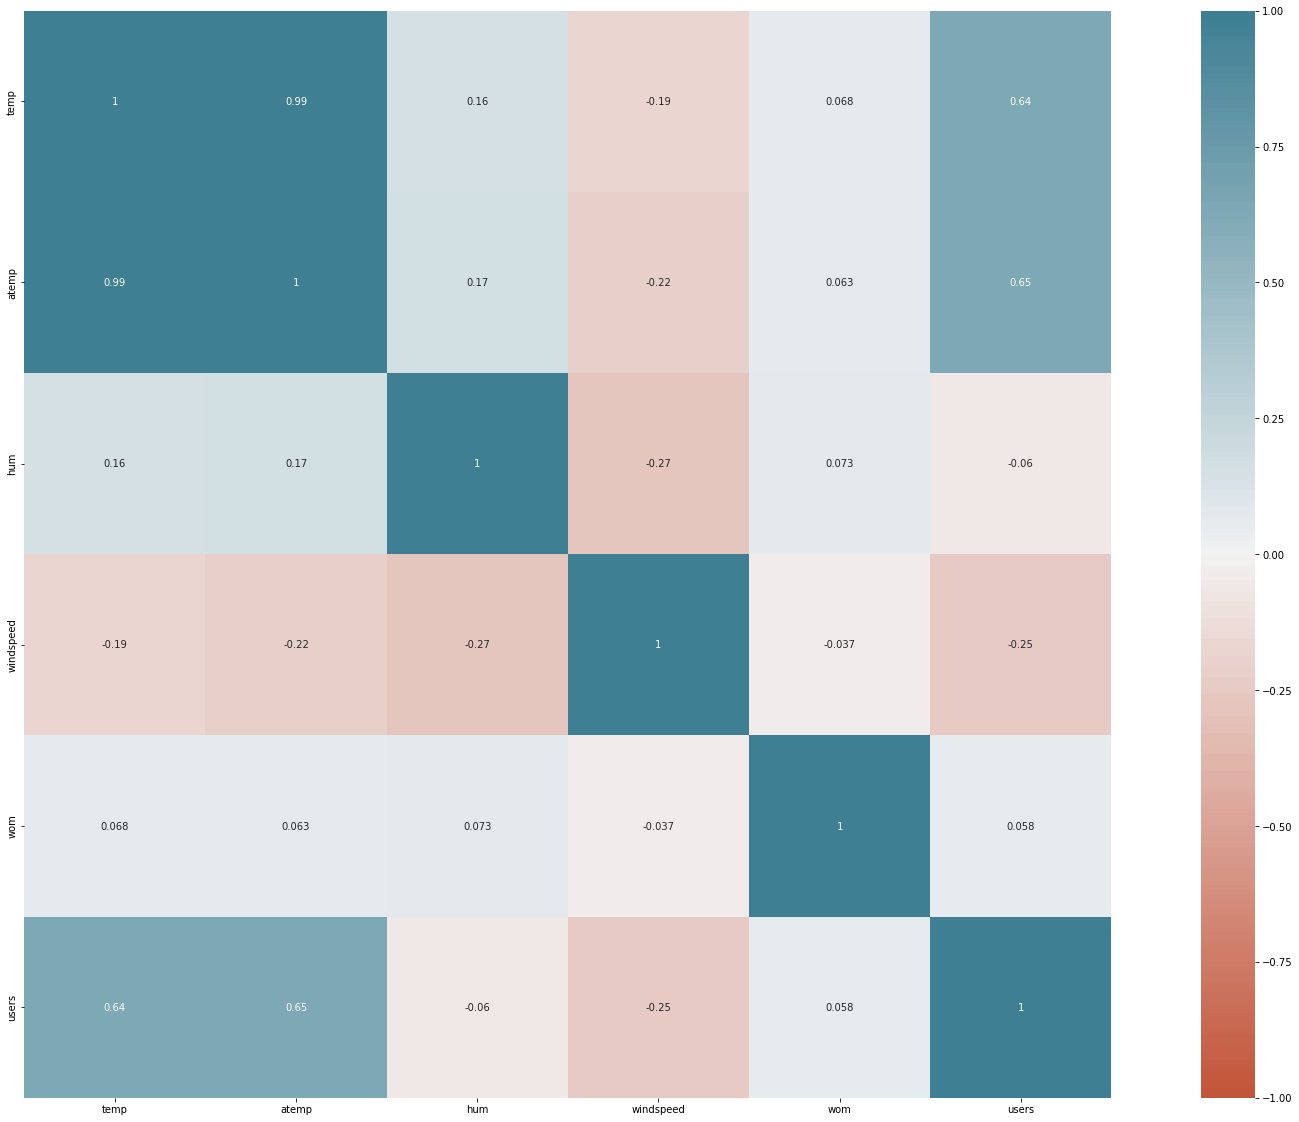

In [75]:
plt.figure(figsize = (32, 20))
# sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
# plt.show()
corrMatrix = df_train[numeric_vars+dependent_var].corr()
sns.heatmap(corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
    )
plt.show()

### 2.3.2 Scaling of test data

In [76]:
df_test[numeric_vars+dependent_var] = scaler.transform(df_test[numeric_vars+dependent_var])
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed       users         wom  season_spring  ...  weekday_Sat  \
count  219.000000  219.000000  219.000000     219.000000  ...   219.000000   
mean     0.313350    0.520592    0.415525       0.255708  ...     0.118721   
std      0.159947    0.218435    0.261850       0.437258  ...     0.324202   
min     -0.042808    0.048205    0.000000       0.000000  ...     0.000000   
25%      0.198517    0.377531    0.200000       0.000000  ...     0.000000   
50%      0.299459    0.524275    0.400000       0.000000  ...     0.000000   
75%      0.403048    0.672745    0.600000       1.000000  ...     0.000000   
max      0.807474    0.963300    1.000000       1.000000  ...     1.000000   

       weekday_Sun  weekday_Mon  weekday_Tue  weekday_Wed  weekday_Thu  \
count   219.000000   219.000000   219.000000   219.000000   219.000000   
mean      0.146119     0.127854     0.164384     0.100457     0.164384   
std       0.354034     0.334692     0.371472     0.301297     0.371472   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Fri  weathersit_2.0  weathersit_1.0  weathersit_3.0  
count   219.000000      219.000000      219.000000      219.000000  
mean      0.178082        0.319635        0.652968        0.027397  
std       0.383458        0.467403        0.477117        0.163612  
min       0.000000        0.000000        0.000000        0.000000  
25%       0.000000        0.000000        0.000000        0.000000  
50%       0.000000        0.000000        1.000000        0.000000  
75%       0.000000        1.000000        1.000000        0.000000  
max       1.000000        1.000000        1.000000        1.000000  

[8 rows x 35 columns]

## 2.4 Splitting into dependent and independent features

In [77]:
y_train = df_train.pop('users')
X_train = df_train

y_test = df_test.pop('users')
X_test = df_test


In [78]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (510, 34)
y_train:  (510,)
X_test:  (219, 34)
y_test:  (219,)


# 3. Building multiple regression model

## 3.0 Model building function

In [79]:
def build_mult_lr_model(arg_X_train,arg_y_train):
    ## Add a constant
    X_train_lm = sm.add_constant(arg_X_train)
    #############################
    ## Linear modelling
    #############################
    lr_sel = sm.OLS(arg_y_train, X_train_lm).fit()
    print("LR model parameters:\n",lr_sel.params)
    print("LR model summary: \n",lr_sel.summary())
    #############################
    ## Checking VIF
    #############################
    if arg_X_train.shape[1] > 1:
        vif = pd.DataFrame()
        vif['Features'] = arg_X_train.columns
        vif['VIF'] = [variance_inflation_factor(arg_X_train.values, i) for i in range(arg_X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print("LR model's VIF values: \n",vif)
    print("Residual Analysis of training data")
    #############################
    ## Prediction on training data
    #############################
    y_train_predict = lr_sel.predict(X_train_lm)
    ## Plot the histogram of the error terms
    fig = plt.figure()
    sns.distplot((y_train - y_train_predict), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18)                         # X-label
    train_r_sq = r2_score(arg_y_train, y_train_predict)
    print("==== Training r-squared: {}".format(train_r_sq))
    train_adj_r_sq = 1.0 - (((1.0 - train_r_sq)*(arg_X_train.shape[0] - 1.0))/(arg_X_train.shape[0]-arg_X_train.shape[1]-1))
    print("==== Training adjusted r-squared: {}".format(train_adj_r_sq))
    # sm.qqplot((y_train - y_train_predict),line='45')
    # plt.show()
    #############################
    ## Prediction on test data 
    #############################
    print("Prediction on Test data")
    ## Dividing into X_test and y_test
    X_test_model = X_test[arg_X_train.columns]
    X_test_lm = sm.add_constant(X_test_model)
    y_pred = lr_sel.predict(X_test_lm)
    test_r_sq = r2_score(y_test, y_pred)
    print("==== Testing r-squared: {}".format(test_r_sq))
    test_adj_r_sq = 1.0 - (((1.0 - test_r_sq)*(X_test_model.shape[0] - 1.0))/(X_test_model.shape[0]-X_test_model.shape[1]-1))
    print("==== Testing adjusted r-squared: {}".format(test_adj_r_sq))
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16)                          # Y-label

    

    

## 3.1 Manual selection based modelling

### 3.1.1 Correlation matrix

In [80]:
corrMatrix = df_model.corr()
# print(corrMatrix)
sorted_abs = corrMatrix['users'].abs().round(2).sort_values(ascending=False)
list_features = []
THRES_SEL = 0.2
print(type(sorted_abs))
for feature_name in sorted_abs.keys():
    # print(feature_name,sorted_abs[feature_name])
    if sorted_abs[feature_name] > THRES_SEL:
        list_features.append(feature_name)
        print("{}: {}".format(feature_name,sorted_abs[feature_name]))

print(list_features)



<class 'pandas.core.series.Series'>
users: 1.0
temp: 0.63
atemp: 0.63
yr: 0.57
season_spring: 0.56
mnth_Jan: 0.37
season_fall: 0.35
mnth_Feb: 0.27
weathersit_1.0: 0.25
weathersit_3.0: 0.24
windspeed: 0.24
['users', 'temp', 'atemp', 'yr', 'season_spring', 'mnth_Jan', 'season_fall', 'mnth_Feb', 'weathersit_1.0', 'weathersit_3.0', 'windspeed']


In [81]:
# plt.figure(figsize=(40,40))
# sns.heatmap(corrMatrix, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True,
#     annot=True
#     )
# plt.show()

### 3.1.2 Features

In [82]:
features_corr_matrix = [
    'temp', 'atemp', 'yr', 'season_spring', 'mnth_Jan', 'mnth_Feb', 'season_fall', 'weathersit_1.0', 'weathersit_3.0', 'windspeed'
    ]
X_train_manual = X_train[features_corr_matrix]
X_train_manual.describe()

temp       atemp          yr  season_spring    mnth_Jan  \
count  510.000000  510.000000  510.000000     510.000000  510.000000   
mean     0.537262    0.512989    0.507843       0.243137    0.088235   
std      0.225844    0.212385    0.500429       0.429398    0.283915   
min      0.000000    0.000000    0.000000       0.000000    0.000000   
25%      0.339853    0.332086    0.000000       0.000000    0.000000   
50%      0.540519    0.526811    1.000000       0.000000    0.000000   
75%      0.735215    0.688457    1.000000       0.000000    0.000000   
max      1.000000    1.000000    1.000000       1.000000    1.000000   

         mnth_Feb  season_fall  weathersit_1.0  weathersit_3.0   windspeed  
count  510.000000   510.000000      510.000000      510.000000  510.000000  
mean     0.066667     0.262745        0.627451        0.029412    0.320768  
std      0.249689     0.440557        0.483958        0.169124    0.169797  
min      0.000000     0.000000        0.000000        0.000000    0.000000  
25%      0.000000     0.000000        0.000000        0.000000    0.199179  
50%      0.000000     0.000000        1.000000        0.000000    0.296763  
75%      0.000000     1.000000        1.000000        0.000000    0.414447  
max      1.000000     1.000000        1.000000        1.000000    1.000000

### 3.1.3 Modelling

LR model parameters:
 const             0.236288
temp              0.383321
atemp             0.026061
yr                0.236056
season_spring    -0.122119
mnth_Jan         -0.061120
mnth_Feb         -0.028219
season_fall      -0.039623
weathersit_1.0    0.074682
weathersit_3.0   -0.197097
windspeed        -0.173169
dtype: float64
LR model summary: 
                             OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.69e-178
Time:                        21:31:41   Log-Likelihood:                 474.94
No. Observations:                 510   AIC:                            -927.9
Df Residuals:                     499   BIC:                            -881.3
Df Model:     

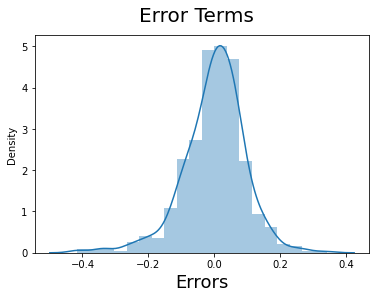

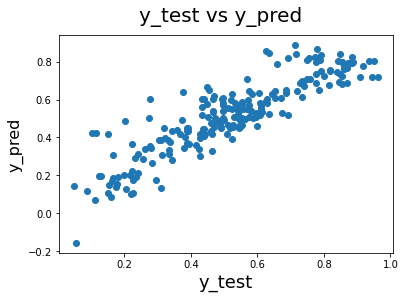

In [83]:
build_mult_lr_model(X_train_manual,y_train)

## 3.2 Modelling with all features

### 3.1.1 Features

In [84]:
X_train_all = X_train[X_train.columns]
X_train_all.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         wom  season_spring  season_summer  ...  weekday_Sat  \
count  510.000000  510.000000     510.000000     510.000000  ...   510.000000   
mean     0.320768    0.419216       0.243137       0.245098  ...     0.154902   
std      0.169797    0.263614       0.429398       0.430568  ...     0.362166   
min      0.000000    0.000000       0.000000       0.000000  ...     0.000000   
25%      0.199179    0.200000       0.000000       0.000000  ...     0.000000   
50%      0.296763    0.400000       0.000000       0.000000  ...     0.000000   
75%      0.414447    0.600000       0.000000       0.000000  ...     0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...     1.000000   

       weekday_Sun  weekday_Mon  weekday_Tue  weekday_Wed  weekday_Thu  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.143137     0.150980     0.131373     0.158824     0.133333   
std       0.350557     0.358381     0.338139     0.365870     0.340268   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Fri  weathersit_2.0  weathersit_1.0  weathersit_3.0  
count   510.000000      510.000000      510.000000      510.000000  
mean      0.127451        0.343137        0.627451        0.029412  
std       0.333805        0.475223        0.483958        0.169124  
min       0.000000        0.000000        0.000000        0.000000  
25%       0.000000        0.000000        0.000000        0.000000  
50%       0.000000        0.000000        1.000000        0.000000  
75%       0.000000        1.000000        1.000000        0.000000  
max       1.000000        1.000000        1.000000        1.000000  

[8 rows x 34 columns]

### 3.1.3 Modelling

LR model parameters:
 const             0.109956
yr                0.232200
holiday          -0.031383
workingday        0.055041
temp              0.404576
atemp             0.047595
hum              -0.150013
windspeed        -0.184199
wom              -0.008637
season_spring    -0.045889
season_summer     0.042696
season_fall       0.004684
season_winter     0.108465
mnth_Jan         -0.045247
mnth_Feb         -0.014703
mnth_Mar          0.018457
mnth_Apr          0.015628
mnth_May          0.040111
mnth_Jun          0.014689
mnth_Jul         -0.023749
mnth_Aug          0.032139
mnth_Sep          0.097890
mnth_Oct          0.025638
mnth_Nov         -0.023401
mnth_Dec         -0.027496
weekday_Sat       0.070537
weekday_Sun       0.015762
weekday_Mon      -0.005298
weekday_Tue      -0.003375
weekday_Wed       0.010114
weekday_Thu       0.005813
weekday_Fri       0.016402
weathersit_2.0    0.081430
weathersit_1.0    0.142975
weathersit_3.0   -0.114449
dtype: float64
LR model summary: 

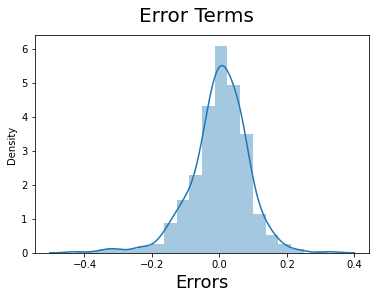

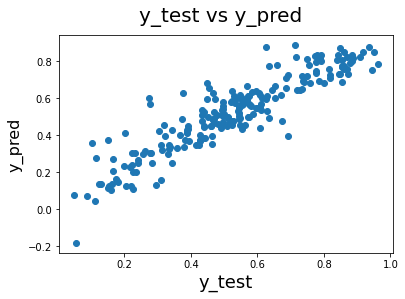

In [85]:
build_mult_lr_model(X_train_all,y_train)

## 3.3 p-value based feature selection and modelling

### 3.3.1 Features: selected based on p-value lower than 0.05

In [86]:
p_val_cols = [
    'yr',
    'workingday',
    'temp',
    'hum' ,
    'windspeed',
    'season_spring',
    'season_summer',
    'season_winter',
    'mnth_Sep',
    'weekday_Sat' ,
    'weathersit_2.0',
    'weathersit_1.0',
    'weathersit_3.0'
    ]
X_train_pval = X_train[p_val_cols]
X_train_pval.describe()

yr  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.676471    0.537262    0.650369    0.320768   
std      0.500429    0.468282    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       season_spring  season_summer  season_winter    mnth_Sep  weekday_Sat  \
count     510.000000     510.000000      510.00000  510.000000   510.000000   
mean        0.243137       0.245098        0.24902    0.080392     0.154902   
std         0.429398       0.430568        0.43287    0.272166     0.362166   
min         0.000000       0.000000        0.00000    0.000000     0.000000   
25%         0.000000       0.000000        0.00000    0.000000     0.000000   
50%         0.000000       0.000000        0.00000    0.000000     0.000000   
75%         0.000000       0.000000        0.00000    0.000000     0.000000   
max         1.000000       1.000000        1.00000    1.000000     1.000000   

       weathersit_2.0  weathersit_1.0  weathersit_3.0  
count      510.000000      510.000000      510.000000  
mean         0.343137        0.627451        0.029412  
std          0.475223        0.483958        0.169124  
min          0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000  
50%          0.000000        1.000000        0.000000  
75%          1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000

### 3.3.2 Modelling

LR model parameters:
 const             0.086053
yr                0.230700
workingday        0.053223
temp              0.512675
hum              -0.150823
windspeed        -0.179875
season_spring    -0.044772
season_summer     0.068717
season_winter     0.111924
mnth_Sep          0.094023
weekday_Sat       0.062701
weathersit_2.0    0.073316
weathersit_1.0    0.130626
weathersit_3.0   -0.117890
dtype: float64
LR model summary: 
                             OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          4.23e-191
Time:                        21:31:44   Log-Likelihood:                 510.90
No. Observations:                 510   AIC:                            -995.8
Df Residuals

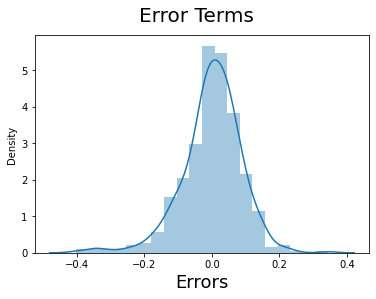

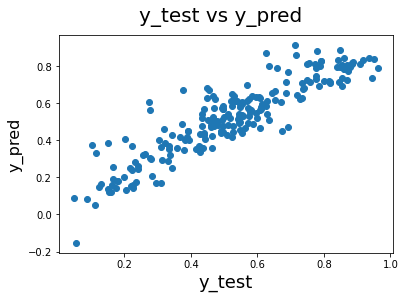

In [87]:
build_mult_lr_model(X_train_pval,y_train)

## 3.4 Mixed approach to multiple linear regression modelling
- Automated (RFE-based) for coarse feature selection
- Manual fine-tuning 
  -  Elimination of features with high p-value
  -  Elimination of features with high VIF
  -  Rebuild and repeat p-value and VIF based elimination of features

### 3.4.1 RFE-based coarse feature selection

#### All features

In [88]:
X_train_rfe = X_train[X_train.columns]
print("Total features: ", len(X_train_rfe.columns))
X_train_rfe.describe()

Total features:  34


yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         wom  season_spring  season_summer  ...  weekday_Sat  \
count  510.000000  510.000000     510.000000     510.000000  ...   510.000000   
mean     0.320768    0.419216       0.243137       0.245098  ...     0.154902   
std      0.169797    0.263614       0.429398       0.430568  ...     0.362166   
min      0.000000    0.000000       0.000000       0.000000  ...     0.000000   
25%      0.199179    0.200000       0.000000       0.000000  ...     0.000000   
50%      0.296763    0.400000       0.000000       0.000000  ...     0.000000   
75%      0.414447    0.600000       0.000000       0.000000  ...     0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...     1.000000   

       weekday_Sun  weekday_Mon  weekday_Tue  weekday_Wed  weekday_Thu  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.143137     0.150980     0.131373     0.158824     0.133333   
std       0.350557     0.358381     0.338139     0.365870     0.340268   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Fri  weathersit_2.0  weathersit_1.0  weathersit_3.0  
count   510.000000      510.000000      510.000000      510.000000  
mean      0.127451        0.343137        0.627451        0.029412  
std       0.333805        0.475223        0.483958        0.169124  
min       0.000000        0.000000        0.000000        0.000000  
25%       0.000000        0.000000        0.000000        0.000000  
50%       0.000000        0.000000        1.000000        0.000000  
75%       0.000000        1.000000        1.000000        0.000000  
max       1.000000        1.000000        1.000000        1.000000  

[8 rows x 34 columns]

#### Executing RFE

In [89]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe, y_train)
rfe_inst = RFE(lm_rfe,n_features_to_select=30)             # running RFE
rfe_inst = rfe_inst.fit(X_train_rfe, y_train)
rfe_ranking = list(zip(X_train.columns,rfe_inst.support_,rfe_inst.ranking_))
# print(rfe_1_ranking)
rfe_ranking

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 4),
 ('wom', False, 5),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Dec', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weekday_Thu', True, 1),
 ('weekday_Fri', True, 1),
 ('weathersit_2.0', True, 1),
 ('weathersit_1.0', True, 1),
 ('weathersit_3.0', True, 1)]

#### RFE selection-based feature selection

In [90]:
rfe_sel_cols = X_train.columns[rfe_inst.support_]
print(rfe_sel_cols)
X_train_rfe_sel = X_train[rfe_sel_cols]
X_train_rfe_sel.describe()

Index(['yr', 'holiday', 'workingday', 'atemp', 'season_spring',
       'season_summer', 'season_fall', 'season_winter', 'mnth_Jan', 'mnth_Feb',
       'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec', 'weekday_Sat',
       'weekday_Sun', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed',
       'weekday_Thu', 'weekday_Fri', 'weathersit_2.0', 'weathersit_1.0',
       'weathersit_3.0'],
      dtype='object')


yr     holiday  workingday       atemp  season_spring  \
count  510.000000  510.000000  510.000000  510.000000     510.000000   
mean     0.507843    0.025490    0.676471    0.512989       0.243137   
std      0.500429    0.157763    0.468282    0.212385       0.429398   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.000000    0.000000    0.000000    0.332086       0.000000   
50%      1.000000    0.000000    1.000000    0.526811       0.000000   
75%      1.000000    0.000000    1.000000    0.688457       0.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       season_summer  season_fall  season_winter    mnth_Jan    mnth_Feb  ...  \
count     510.000000   510.000000      510.00000  510.000000  510.000000  ...   
mean        0.245098     0.262745        0.24902    0.088235    0.066667  ...   
std         0.430568     0.440557        0.43287    0.283915    0.249689  ...   
min         0.000000     0.000000        0.00000    0.000000    0.000000  ...   
25%         0.000000     0.000000        0.00000    0.000000    0.000000  ...   
50%         0.000000     0.000000        0.00000    0.000000    0.000000  ...   
75%         0.000000     1.000000        0.00000    0.000000    0.000000  ...   
max         1.000000     1.000000        1.00000    1.000000    1.000000  ...   

       weekday_Sat  weekday_Sun  weekday_Mon  weekday_Tue  weekday_Wed  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.154902     0.143137     0.150980     0.131373     0.158824   
std       0.362166     0.350557     0.358381     0.338139     0.365870   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Thu  weekday_Fri  weathersit_2.0  weathersit_1.0  \
count   510.000000   510.000000      510.000000      510.000000   
mean      0.133333     0.127451        0.343137        0.627451   
std       0.340268     0.333805        0.475223        0.483958   
min       0.000000     0.000000        0.000000        0.000000   
25%       0.000000     0.000000        0.000000        0.000000   
50%       0.000000     0.000000        0.000000        1.000000   
75%       0.000000     0.000000        1.000000        1.000000   
max       1.000000     1.000000        1.000000        1.000000   

       weathersit_3.0  
count      510.000000  
mean         0.029412  
std          0.169124  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 30 columns]

#### Modelling

LR model parameters:
 const             0.037516
yr                0.236579
holiday          -0.040978
workingday        0.039631
atemp             0.402813
season_spring    -0.073725
season_summer     0.014966
season_fall      -0.003657
season_winter     0.099933
mnth_Jan         -0.057372
mnth_Feb         -0.032422
mnth_Mar          0.007746
mnth_Apr          0.003842
mnth_May          0.045223
mnth_Jun          0.036039
mnth_Jul         -0.005710
mnth_Aug          0.046839
mnth_Sep          0.097450
mnth_Oct          0.000913
mnth_Nov         -0.053169
mnth_Dec         -0.051863
weekday_Sat       0.047550
weekday_Sun      -0.008686
weekday_Mon      -0.014369
weekday_Tue      -0.009626
weekday_Wed       0.005829
weekday_Thu       0.001454
weekday_Fri       0.015365
weathersit_2.0    0.058479
weathersit_1.0    0.142666
weathersit_3.0   -0.163629
dtype: float64
LR model summary: 
                             OLS Regression Results                            
Dep. Variable:             

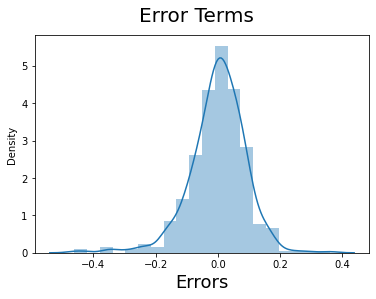

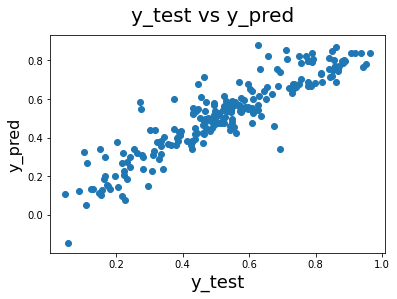

In [91]:
build_mult_lr_model(X_train_rfe_sel,y_train)

### 3.4.2 p-value-based manual feature selection

#### Features

In [92]:
sel_cols = [
    'yr'  ,
'holiday'   ,
'workingday'   ,
'atemp'  ,
'season_spring' ,
'season_winter' ,
'mnth_Jan' ,
'mnth_May'  ,
'mnth_Aug' ,
'mnth_Sep' ,
'mnth_Nov' ,
'mnth_Dec' ,
'weekday_Sat' ,
'weathersit_2.0' ,
'weathersit_1.0' ,
'weathersit_3.0'
]
print(sel_cols)
X_train_sel = X_train[sel_cols]
X_train_sel.describe()

['yr', 'holiday', 'workingday', 'atemp', 'season_spring', 'season_winter', 'mnth_Jan', 'mnth_May', 'mnth_Aug', 'mnth_Sep', 'mnth_Nov', 'mnth_Dec', 'weekday_Sat', 'weathersit_2.0', 'weathersit_1.0', 'weathersit_3.0']


yr     holiday  workingday       atemp  season_spring  \
count  510.000000  510.000000  510.000000  510.000000     510.000000   
mean     0.507843    0.025490    0.676471    0.512989       0.243137   
std      0.500429    0.157763    0.468282    0.212385       0.429398   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.000000    0.000000    0.000000    0.332086       0.000000   
50%      1.000000    0.000000    1.000000    0.526811       0.000000   
75%      1.000000    0.000000    1.000000    0.688457       0.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       season_winter    mnth_Jan    mnth_May    mnth_Aug    mnth_Sep  \
count      510.00000  510.000000  510.000000  510.000000  510.000000   
mean         0.24902    0.088235    0.084314    0.096078    0.080392   
std          0.43287    0.283915    0.278131    0.294988    0.272166   
min          0.00000    0.000000    0.000000    0.000000    0.000000   
25%          0.00000    0.000000    0.000000    0.000000    0.000000   
50%          0.00000    0.000000    0.000000    0.000000    0.000000   
75%          0.00000    0.000000    0.000000    0.000000    0.000000   
max          1.00000    1.000000    1.000000    1.000000    1.000000   

         mnth_Nov    mnth_Dec  weekday_Sat  weathersit_2.0  weathersit_1.0  \
count  510.000000  510.000000   510.000000      510.000000      510.000000   
mean     0.086275    0.084314     0.154902        0.343137        0.627451   
std      0.281045    0.278131     0.362166        0.475223        0.483958   
min      0.000000    0.000000     0.000000        0.000000        0.000000   
25%      0.000000    0.000000     0.000000        0.000000        0.000000   
50%      0.000000    0.000000     0.000000        0.000000        1.000000   
75%      0.000000    0.000000     0.000000        1.000000        1.000000   
max      1.000000    1.000000     1.000000        1.000000        1.000000   

       weathersit_3.0  
count      510.000000  
mean         0.029412  
std          0.169124  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

#### Modelling

LR model parameters:
 const             0.043868
yr                0.236054
holiday          -0.044587
workingday        0.048901
atemp             0.400569
season_spring    -0.102000
season_winter     0.082877
mnth_Jan         -0.046891
mnth_May          0.043181
mnth_Aug          0.026937
mnth_Sep          0.082045
mnth_Nov         -0.053732
mnth_Dec         -0.048841
weekday_Sat       0.058080
weathersit_2.0    0.061951
weathersit_1.0    0.145389
weathersit_3.0   -0.163472
dtype: float64
LR model summary: 
                             OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     162.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          8.23e-180
Time:                        21:31:47   Log-Likelihood:                 492.28
No. Observ

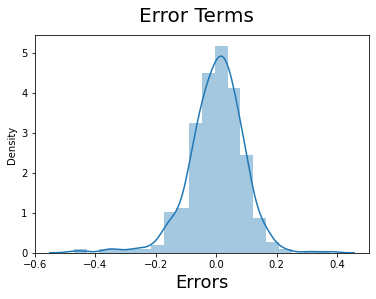

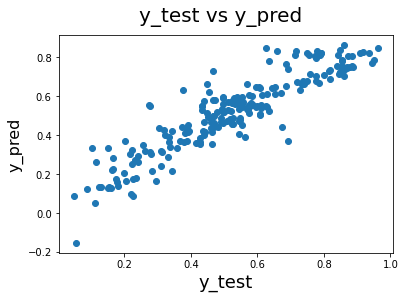

In [93]:
build_mult_lr_model(X_train_sel,y_train)

### 3.4.3 VIF-based manual feature selection

#### Features

In [94]:
sel_cols = [
'yr'  ,
'holiday'   ,
'workingday'   ,
'atemp'  ,
'season_spring' ,
'season_winter' ,
'mnth_Jan' ,
'mnth_May'  ,
'mnth_Aug' ,
'mnth_Sep' ,
'mnth_Nov' ,
'mnth_Dec' ,
'weekday_Sat' ,
'weathersit_2.0' ,
'weathersit_3.0'
]
print(sel_cols)
X_train_sel = X_train[sel_cols]
X_train_sel.describe()

['yr', 'holiday', 'workingday', 'atemp', 'season_spring', 'season_winter', 'mnth_Jan', 'mnth_May', 'mnth_Aug', 'mnth_Sep', 'mnth_Nov', 'mnth_Dec', 'weekday_Sat', 'weathersit_2.0', 'weathersit_3.0']


yr     holiday  workingday       atemp  season_spring  \
count  510.000000  510.000000  510.000000  510.000000     510.000000   
mean     0.507843    0.025490    0.676471    0.512989       0.243137   
std      0.500429    0.157763    0.468282    0.212385       0.429398   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.000000    0.000000    0.000000    0.332086       0.000000   
50%      1.000000    0.000000    1.000000    0.526811       0.000000   
75%      1.000000    0.000000    1.000000    0.688457       0.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       season_winter    mnth_Jan    mnth_May    mnth_Aug    mnth_Sep  \
count      510.00000  510.000000  510.000000  510.000000  510.000000   
mean         0.24902    0.088235    0.084314    0.096078    0.080392   
std          0.43287    0.283915    0.278131    0.294988    0.272166   
min          0.00000    0.000000    0.000000    0.000000    0.000000   
25%          0.00000    0.000000    0.000000    0.000000    0.000000   
50%          0.00000    0.000000    0.000000    0.000000    0.000000   
75%          0.00000    0.000000    0.000000    0.000000    0.000000   
max          1.00000    1.000000    1.000000    1.000000    1.000000   

         mnth_Nov    mnth_Dec  weekday_Sat  weathersit_2.0  weathersit_3.0  
count  510.000000  510.000000   510.000000      510.000000      510.000000  
mean     0.086275    0.084314     0.154902        0.343137        0.029412  
std      0.281045    0.278131     0.362166        0.475223        0.169124  
min      0.000000    0.000000     0.000000        0.000000        0.000000  
25%      0.000000    0.000000     0.000000        0.000000        0.000000  
50%      0.000000    0.000000     0.000000        0.000000        0.000000  
75%      0.000000    0.000000     0.000000        1.000000        0.000000  
max      1.000000    1.000000     1.000000        1.000000        1.000000

#### Modelling

LR model parameters:
 const             0.189257
yr                0.236054
holiday          -0.044587
workingday        0.048901
atemp             0.400569
season_spring    -0.102000
season_winter     0.082877
mnth_Jan         -0.046891
mnth_May          0.043181
mnth_Aug          0.026937
mnth_Sep          0.082045
mnth_Nov         -0.053732
mnth_Dec         -0.048841
weekday_Sat       0.058080
weathersit_2.0   -0.083438
weathersit_3.0   -0.308861
dtype: float64
LR model summary: 
                             OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     162.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          8.23e-180
Time:                        21:31:48   Log-Likelihood:                 492.28
No. Observations:                 510

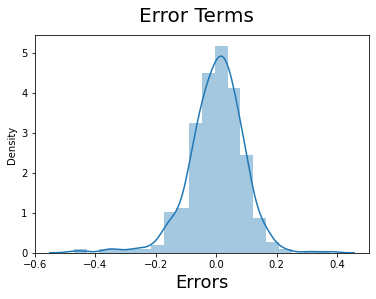

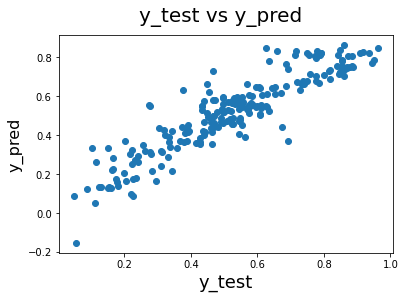

In [95]:
build_mult_lr_model(X_train_sel,y_train)

### 3.4.4 p-value-based manual feature selection(2)

#### Features

In [96]:
sel_cols = [
'yr'  ,
'workingday'   ,
'atemp'  ,
'season_spring' ,
'season_winter' ,
'mnth_Jan' ,
'mnth_May'  ,
'mnth_Sep' ,
'mnth_Nov' ,
'mnth_Dec' ,
'weekday_Sat' ,
'weathersit_2.0' ,
'weathersit_3.0'
]
print(sel_cols)
X_train_sel = X_train[sel_cols]
X_train_sel.describe()

['yr', 'workingday', 'atemp', 'season_spring', 'season_winter', 'mnth_Jan', 'mnth_May', 'mnth_Sep', 'mnth_Nov', 'mnth_Dec', 'weekday_Sat', 'weathersit_2.0', 'weathersit_3.0']


yr  workingday       atemp  season_spring  season_winter  \
count  510.000000  510.000000  510.000000     510.000000      510.00000   
mean     0.507843    0.676471    0.512989       0.243137        0.24902   
std      0.500429    0.468282    0.212385       0.429398        0.43287   
min      0.000000    0.000000    0.000000       0.000000        0.00000   
25%      0.000000    0.000000    0.332086       0.000000        0.00000   
50%      1.000000    1.000000    0.526811       0.000000        0.00000   
75%      1.000000    1.000000    0.688457       0.000000        0.00000   
max      1.000000    1.000000    1.000000       1.000000        1.00000   

         mnth_Jan    mnth_May    mnth_Sep    mnth_Nov    mnth_Dec  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.088235    0.084314    0.080392    0.086275    0.084314   
std      0.283915    0.278131    0.272166    0.281045    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_Sat  weathersit_2.0  weathersit_3.0  
count   510.000000      510.000000      510.000000  
mean      0.154902        0.343137        0.029412  
std       0.362166        0.475223        0.169124  
min       0.000000        0.000000        0.000000  
25%       0.000000        0.000000        0.000000  
50%       0.000000        0.000000        0.000000  
75%       0.000000        1.000000        0.000000  
max       1.000000        1.000000        1.000000

#### Modelling

LR model parameters:
 const             0.180482
yr                0.236265
workingday        0.056147
atemp             0.413542
season_spring    -0.105716
season_winter     0.079213
mnth_Jan         -0.045829
mnth_May          0.036763
mnth_Sep          0.073923
mnth_Nov         -0.056382
mnth_Dec         -0.048474
weekday_Sat       0.065524
weathersit_2.0   -0.081895
weathersit_3.0   -0.309053
dtype: float64
LR model summary: 
                             OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          6.02e-181
Time:                        21:31:49   Log-Likelihood:                 489.57
No. Observations:                 510   AIC:                            -951.1
Df Residuals

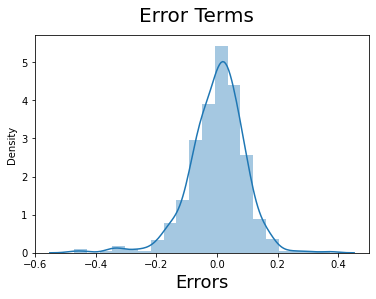

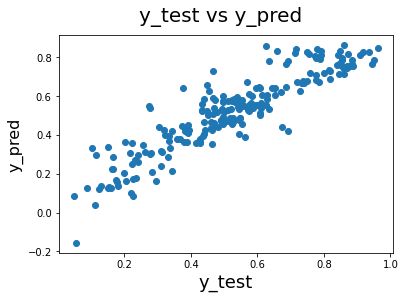

In [97]:
build_mult_lr_model(X_train_sel,y_train)

# Final Model

### users = 0.1805 +  yr * 0.2363 + workingday * 0.0561 + atemp * 0.4135 + season_spring*(-0.1057) + season_winter * 0.0792 + mnth_Jan*(-0.0458) + mnth_May * 0.0368 + mnth_Sep * 0.0739 + mnth_Nov * (-0.0564) + mnth_Dec * (-0.0485) + weekday_Sat*0.0655 + weathersit_2.0 *(-0.0819) +  weathersit_3.0 * (-0.3091 )